# Ch4.4 Probability and Statistics 

September, 14, 2020 

### Guhnoo Yun, 2019010823

In [4]:
%matplotlib inline

from IPython import display

import numpy as np
import matplotlib.pyplot as plt

* Design multinomial distribution with simple dice rolling task
* ```torch.distributinos.multinomial``` package is useful for that 

In [1]:
import torch
from torch.distributions.multinomial import Multinomial

* Assume fair dice, which means each probability is 1/6 -> ```probabilities```
* ```total_count``` depicts 'rolling' or 'sampling'. In this case, rolling one time.
* Assign the predefined probabilities to ```probs``` 
* Sampling action(=rolling action) is described as ```.sample()```

In [5]:
probabilities = torch.ones([6], dtype = torch.float64) / 6   # 6-tuple vector 
distribution = Multinomial(total_count = 1, probs = probabilities)
distribution.sample()

tensor([0., 0., 1., 0., 0., 0.], dtype=torch.float64)

* Let's suppose sampling 1000 times.
* Accumulate the frequency of dice eyes.

In [8]:
num_rolls = 1000
rolls = Multinomial(total_count = 1, probs = probabilities)   # roller who can sample one time at once.
counts = torch.zeros(6, 1000, dtype = torch.double)  # table with 6x1000 shape 
totals = torch.zeros(6, dtype = torch.double)   # frequency table 

for i in range(num_rolls):
    totals = totals + rolls.sample()
    counts[:, i] = totals

* Normalized frequency shown below 

In [9]:
totals / 1000

tensor([0.1640, 0.1690, 0.1710, 0.1700, 0.1490, 0.1770], dtype=torch.float64)

* Accumulating flow  

In [11]:
counts

tensor([[  1.,   1.,   1.,  ..., 163., 163., 164.],
        [  0.,   0.,   0.,  ..., 168., 169., 169.],
        [  0.,   0.,   0.,  ..., 171., 171., 171.],
        [  0.,   1.,   2.,  ..., 170., 170., 170.],
        [  0.,   0.,   0.,  ..., 149., 149., 149.],
        [  0.,   0.,   0.,  ..., 177., 177., 177.]], dtype=torch.float64)

In [12]:
x = torch.arange(1000, dtype = torch.double).reshape((1,1000)) + 1
estimates = counts / x

print(estimates[:,0])   # normalizing at 1 rolling
print(estimates[:,1])   # normalizing at 2 rolling 
print(estimates[:,100]) # normalizing at 101 rolling 

tensor([1., 0., 0., 0., 0., 0.], dtype=torch.float64)
tensor([0.5000, 0.0000, 0.0000, 0.5000, 0.0000, 0.0000], dtype=torch.float64)
tensor([0.1188, 0.2079, 0.1287, 0.2673, 0.0792, 0.1980], dtype=torch.float64)


* The larger number of rolling, the more convergence to the absolute probability.
* Horizontal-axis means the number of rolling(=sampling)
* 1/6 ≒ 1.667

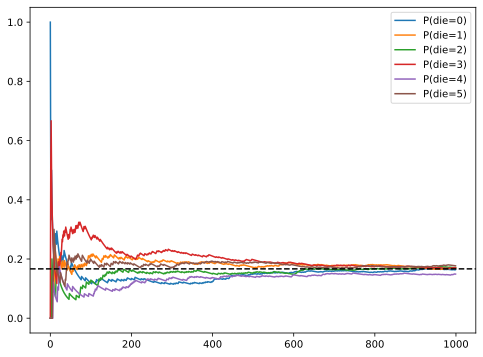

In [13]:
display.set_matplotlib_formats('svg')

plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(estimates[i, :].numpy(), label=("P(die=" + str(i) +")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

***

* built-in sampling function in Python 

In [17]:
import random

for i in range(10):
    print(random.random())   # random in range [0,1)

0.9766297169137832
0.3076727413540681
0.035286529458596005
0.6136265493246212
0.03083264881552572
0.16877637010881108
0.13229900756665425
0.9242433964553317
0.09913920772414109
0.3586346158218302


* Uniform distribution 

In [18]:
for i in range(10):
    print(random.randint(1, 100))  # random integer in range [1, 100)

84
78
66
8
10
34
18
62
57
82


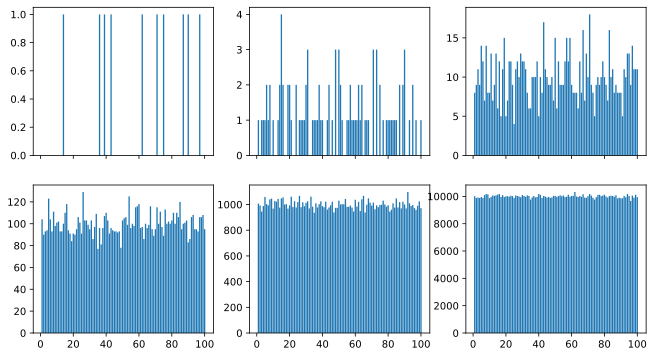

In [19]:
import math

counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(11, 6), sharex=True)
axes = axes.reshape(6)

# Mangle subplots such that we can index them in a linear fashion rather than
# a 2D grid

for i in range(1, 1000001):
    counts[random.randint(0, 99)] += 1
    if i in [10, 100, 1000, 10000, 100000, 1000000]:
        axes[int(math.log10(i))-1].bar(np.arange(1, 101), counts)
plt.show()

* The categorical distribution 
* drawing non-uniform distribution 

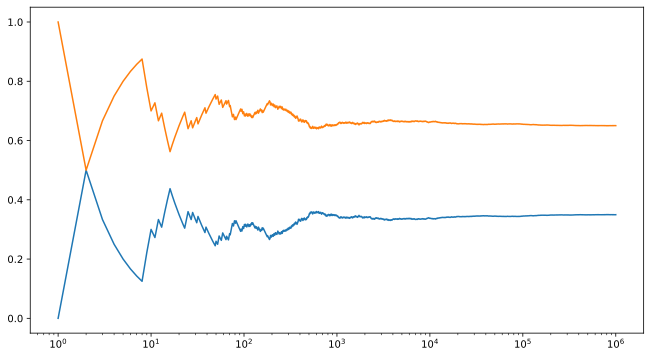

In [21]:
# Number of samples
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n+1)

# Count number of occurrences and divide by the number of total draws
p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

plt.figure(figsize=(11, 6))
plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.show()

* The normal distribution 

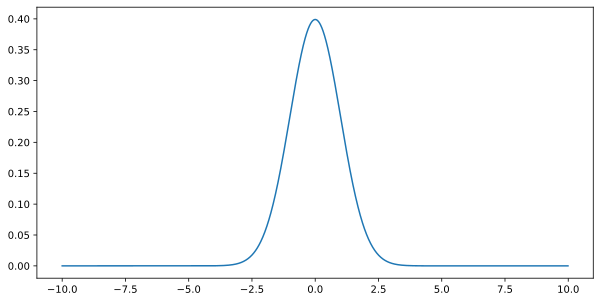

In [22]:
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.figure(figsize=(10, 5))
plt.plot(x, p)
plt.show()

mean 0.9, variance 0.49


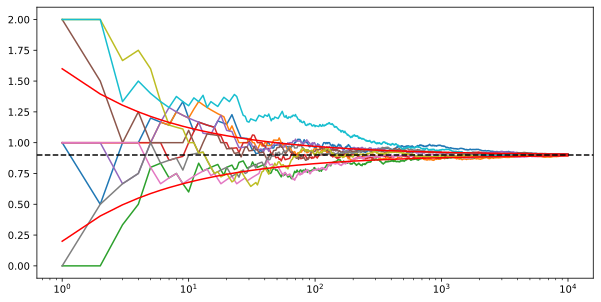

In [24]:
# Generate 10 random sequences of 10,000 uniformly distributed random variables
tmp = np.random.uniform(size=(10000,10))
x = 1.0 * (tmp > 0.3) + 1.0 * (tmp > 0.8)
mean = 1 * 0.5 + 2 * 0.2
variance = 1 * 0.5 + 4 * 0.2 - mean**2
print('mean {}, variance {}'.format(mean, variance))

# Cumulative sum and normalization
y = np.arange(1,10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

plt.figure(figsize=(10,5))
for i in range(10):
    plt.semilogx(y,z[:,i])

plt.semilogx(y,(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y,-(variance**0.5) * np.power(y,-0.5) + mean,'r')

plt.axhline(y=mean, color='black', linestyle='dashed')
plt.show()